## Dataset 
The dataset is a pima indian diabetes that i got from https://www.kaggle.com/uciml/pima-indians-diabetes-database. The dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The sample in this dataset is all female patients and at leats 21 years old of pima indians heritage. The dataset is contain 9 column, 8 columns is the medical predictor (independen variables) and 1 column is a target (dependen variable). The goal from this project is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [31]:
data= pd.read_csv('E://EGY/DATA/diabetes.csv')
print(data.shape)
print(data.isnull().sum())

(768, 9)
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [32]:
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [33]:
new_col = {'Pregnancies': 'preg', 'Glucose': 'gluc', 'BloodPressure': 'pres', 'SkinThickness':'skin', 'Insulin':'insu', 'BMI':'bmi', 'DiabetesPedigreeFunction':'dbpf', 'Age':'age', 'Outcome':'out'}

In [34]:
data.rename(columns = new_col, inplace = True)
data.head()

,preg,gluc,pres,skin,insu,bmi,dbpf,age,out
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Input Variales (X)
1. preg : Number of times pregnant
2. gluc : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. pres : Diastolic blood pressure (mm Hg)
4. skin : Triceps skin fold thickness (mm)
5. insu : 2-Hour serum insulin (mu U/ml)
6. bmi : Body mass index (weight in kg/(height in m)^2)
7. dbpf : Diabetes pedigree function
8. age : Age (years)

### Target Variable (Y): 
out : Target variable. 0 represent individual who do not have diabetes and 1 represent individual who have diabetes.

### Handling missing value 
I define the missing value in this dataset are 0 in all columns except the output (of course cuz the output 0 mean that the patient dont have diabetes).\
So we need to replace 0 as NaN value in all columns except output. After that i'll drop the NaN values.


In [35]:
data[['preg','gluc', 'pres', 'skin', 'insu', 'bmi', 'dbpf', 'age']] = data[['preg','gluc', 'pres', 'skin', 'insu', 'bmi', 'dbpf', 'age']].replace(0,np.NaN)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    657 non-null    float64
 1   gluc    763 non-null    float64
 2   pres    733 non-null    float64
 3   skin    541 non-null    float64
 4   insu    394 non-null    float64
 5   bmi     757 non-null    float64
 6   dbpf    768 non-null    float64
 7   age     768 non-null    int64  
 8   out     768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


#### Replacing Missing Value 

After see the info above we can conclude that there are 6 column got missing value, for insulin column we have a half of data are missing values. Since the data are numeric values, the missing values can be replace with some numerical values. 

**preg**

In [37]:
print('Missing Values in Pregnancies columns:', data['preg'].isnull().sum())

Missing Values in Pregnancies columns: 111


For Pregnancies i will replace the missing values by the mean based on their output. 

In [62]:
preg_rep = data[data['preg'].notnull()]
preg_rep = preg_rep[['preg', 'out']].groupby(['out'])[['preg']].mean().apply(np.ceil).reset_index()
print(preg_rep)

   out  preg
0    0   4.0
1    1   6.0


In [39]:
# Replace the missing value in Pregnancies column
data.loc[(data['out'] == 0 ) & (data['preg'].isnull()), 'preg'] = 4
data.loc[(data['out'] == 1 ) & (data['preg'].isnull()), 'preg'] = 6
print('Missing Values in Pregnancies columns:', data['preg'].isnull().sum())

Missing Values in Pregnancies columns: 0


**Gluc**

In [40]:
print('Missing Values in Glucose columns:', data['gluc'].isnull().sum())

Missing Values in Glucose columns: 5


In [41]:
# Replace Missing values in glucose column by mean
data['gluc'].fillna(data['gluc'].mean(), inplace= True)
print('Missing Values in Glucose columns:', data['gluc'].isnull().sum())

Missing Values in Glucose columns: 0


**Pres**

In [42]:
print('Missing Values in BloodPressure columns:', data['pres'].isnull().sum())

Missing Values in BloodPressure columns: 35


In [43]:
# Replace Missing values in BloodPressure column by median
data['pres'].fillna(data['pres'].median(), inplace= True)
print('Missing Values in BloodPressure columns:', data['pres'].isnull().sum())

Missing Values in BloodPressure columns: 0


**Skin**

In [44]:
print('Missing Values in SkinThickness columns:', data['skin'].isnull().sum())

Missing Values in SkinThickness columns: 227


For SkinThickness i will replace the missing values by the median based on their output. 

In [45]:
skin_rep = data[data['skin'].notnull()]
skin_rep = skin_rep[['skin', 'out']].groupby(['out'])[['skin']].median().reset_index()
print(skin_rep)

   out  skin
0    0  27.0
1    1  32.0


In [46]:
# Replace the missing value in SkinThickness column
data.loc[(data['out'] == 0 ) & (data['skin'].isnull()), 'skin'] = 27
data.loc[(data['out'] == 1 ) & (data['skin'].isnull()), 'skin'] = 32
print('Missing Values in SkinThickness columns:', data['skin'].isnull().sum())

Missing Values in SkinThickness columns: 0


**Insu**

In [47]:
print('Missing Values in Insulin columns:', data['insu'].isnull().sum())

Missing Values in Insulin columns: 374


Same as skinthickness i will replace the missing values in insulin column by mean based on their output.

In [48]:
insu_rep = data[data['insu'].notnull()]
insu_rep = insu_rep[['insu', 'out']].groupby(['out'])[['insu']].mean().apply(np.ceil).reset_index()
print(insu_rep)

   out   insu
0    0  131.0
1    1  207.0


In [49]:
# Replace the missing value in Insulin column
data.loc[(data['out'] == 0 ) & (data['insu'].isnull()), 'insu'] = 131
data.loc[(data['out'] == 1 ) & (data['insu'].isnull()), 'insu'] = 207
print('Missing Values in Insulin columns:', data['insu'].isnull().sum())

Missing Values in Insulin columns: 0


**bmi**

In [50]:
print('Missing Values in BMI columns:', data['bmi'].isnull().sum())

Missing Values in BMI columns: 11


In [51]:
# Replace missing values in BMI column by mean
# Replace Missing values in glucose column by mean
data['bmi'].fillna(data['bmi'].mean(), inplace= True)
print('Missing Values in BMI columns:', data['bmi'].isnull().sum())

Missing Values in BMI columns: 0


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    float64
 1   gluc    768 non-null    float64
 2   pres    768 non-null    float64
 3   skin    768 non-null    float64
 4   insu    768 non-null    float64
 5   bmi     768 non-null    float64
 6   dbpf    768 non-null    float64
 7   age     768 non-null    int64  
 8   out     768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


### Data Exploration 

In [54]:
data['out'].value_counts()

0    500
1    268
Name: out, dtype: int64

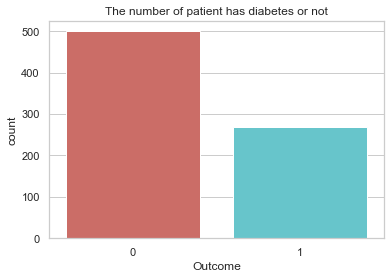

In [55]:
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='out', data= data, palette ='hls')
plt.title('The number of patient has diabetes or not')
plt.xlabel('Outcome')
plt.show()

There are 500 sample patient with 0, it means that she dont have diabetes, and 268 sample patient have diabetes.

In [56]:
data.groupby('out').mean()

,preg,gluc,pres,skin,insu,bmi,dbpf,age
out,,,,,,,,
0,3.882000,110.710121,70.920000,27.170000,130.624000,30.888434,0.429734,31.190000
1,5.716418,142.165573,75.123134,32.671642,206.925373,35.384757,0.550500,37.067164


After groping the data by mean, I can conclude that all variables have a higher mean for data output 1. It means that patient who has positive diabetes have a higher diagnostic value than the patient who hasn't diabetes. 

### Visualization

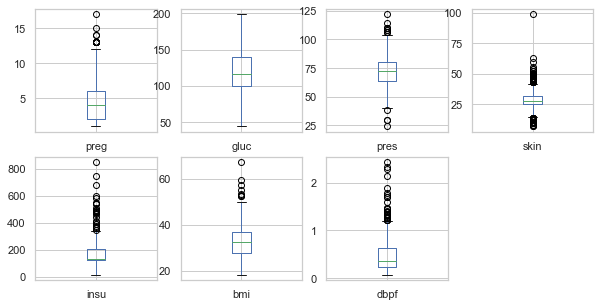

In [57]:
# box plot 
data[['preg', 'gluc', 'pres', 'skin', 'insu', 'bmi', 'dbpf']].plot(kind='box', subplots = True, layout =(2,4), sharex= False, sharey = False)
plt.gcf().set_size_inches(10,5)
plt.show()

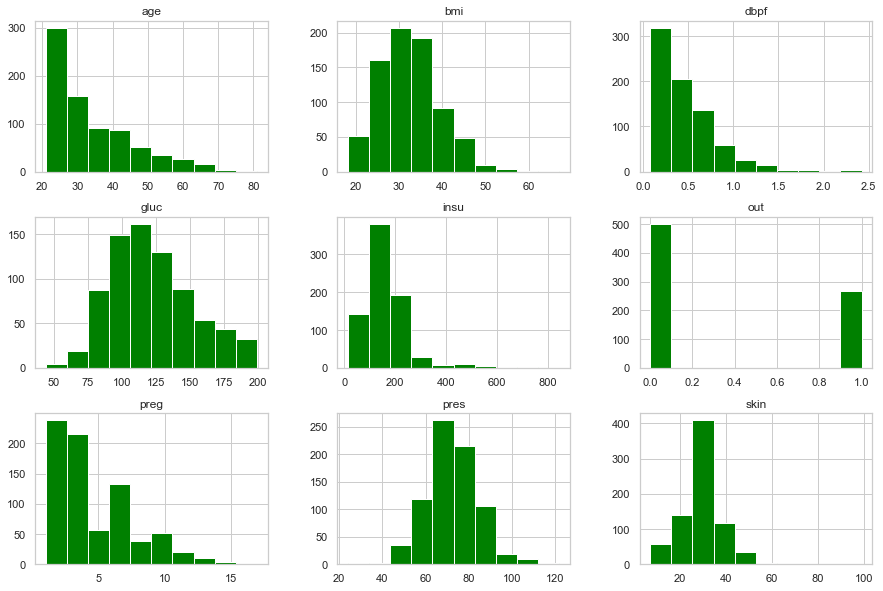

In [58]:
# histogram 
data.hist(color = 'green')
plt.gcf().set_size_inches(15,10)
plt.show()

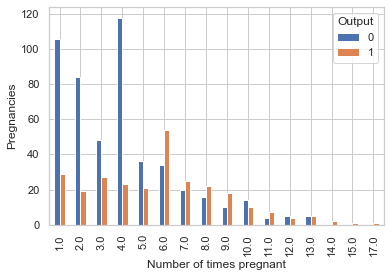

In [59]:
pd.crosstab(data.preg, data.out).plot(kind='bar')
plt.xlabel('Number of times pregnant')
plt.ylabel('Pregnancies')
plt.legend(loc = 'upper right', title = 'Output')
plt.show()

Figure 2 shows patients with their number of pregnancies, it is visible that patients with number of pregnancies below 7 are less likely to be diagnosed with diabetes. That is, the higher the number of pregnancies the higher the chances are of being diagnosed with diabetes.

In [60]:
corr = data.corr(method='spearman')
corr

,preg,gluc,pres,skin,insu,bmi,dbpf,age,out
preg,1.000000,0.208146,0.274751,0.188722,0.240591,0.141378,-0.008222,0.560949,0.296518
gluc,0.208146,1.000000,0.242270,0.254830,0.530622,0.224671,0.090258,0.281331,0.481630
pres,0.274751,0.242270,1.000000,0.212159,0.161811,0.289511,0.009744,0.366221,0.170832
skin,0.188722,0.254830,0.212159,1.000000,0.308506,0.583619,0.066185,0.195109,0.358751
insu,0.240591,0.530622,0.161811,0.308506,1.000000,0.267667,0.076530,0.261870,0.542444
bmi,0.141378,0.224671,0.289511,0.583619,0.267667,1.000000,0.134012,0.120183,0.306577
dbpf,-0.008222,0.090258,0.009744,0.066185,0.076530,0.134012,1.000000,0.042909,0.175353
age,0.560949,0.281331,0.366221,0.195109,0.261870,0.120183,0.042909,1.000000,0.309040
out,0.296518,0.481630,0.170832,0.358751,0.542444,0.306577,0.175353,0.309040,1.000000


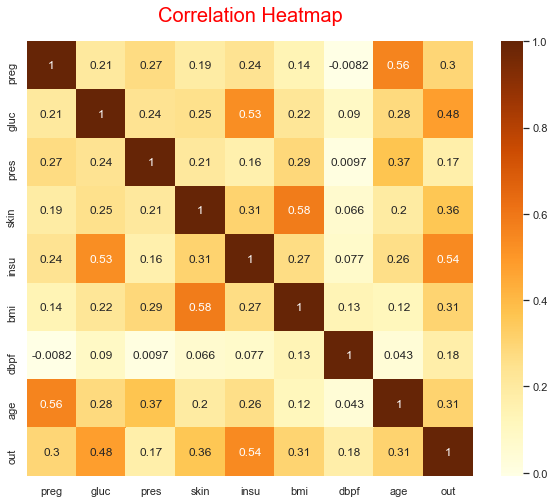

In [61]:
plt.gcf().set_size_inches(10,8)
heatmap = sns.heatmap(data.corr(method='spearman'), annot = True, cmap = 'YlOrBr')
heatmap.set_title('Correlation Heatmap', pad = 20, fontsize = 20, color = 'red')
plt.show()

### Implement Model

In [63]:
import statsmodels.api as sm

In [68]:
X = data[['preg','gluc', 'pres', 'skin', 'insu', 'bmi', 'dbpf', 'age']]
y = data['out']

In [69]:
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.542336
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.162     
Dependent Variable: out              AIC:              849.0281  
Date:               2020-12-24 14:59 BIC:              886.1784  
No. Observations:   768              Log-Likelihood:   -416.51   
Df Model:           7                LL-Null:          -496.74   
Df Residuals:       760              LLR p-value:      2.5720e-31
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
preg       0.1930     0.0336    5.7473   0.0000    0.1272    0.2588
gluc       0.0148     0.0033    4.4685   0.0000    0.0083 

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 7)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [72]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [73]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[127  20]
 [ 27  57]]


In [74]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       147
           1       0.74      0.68      0.71        84

    accuracy                           0.80       231
   macro avg       0.78      0.77      0.78       231
weighted avg       0.79      0.80      0.79       231



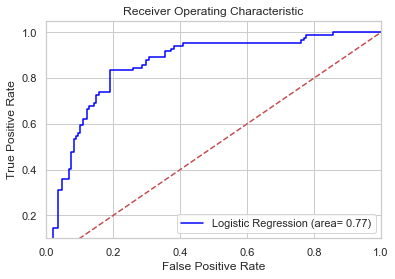

In [75]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area= %0.2f)' % logit_roc_auc, color = 'blue')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.1, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

what if 

In [77]:
A = data[['preg','gluc', 'pres', 'insu']]
b = data['out']

In [78]:
logit_model = sm.Logit(b,A)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.545975
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.156     
Dependent Variable: out              AIC:              846.6183  
Date:               2020-12-24 15:08 BIC:              865.1935  
No. Observations:   768              Log-Likelihood:   -419.31   
Df Model:           3                LL-Null:          -496.74   
Df Residuals:       764              LLR p-value:      2.3500e-33
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
preg      0.1818     0.0299     6.0873   0.0000    0.1233    0.2403
gluc      0.0151     0.0031     4.8595   0.0000    0.0090 

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
A_train, A_test, b_train, b_test = train_test_split(A,b,test_size = 0.3, random_state = 7)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(A_train, b_train)

LogisticRegression(solver='liblinear')

In [80]:
b_pred = logreg.predict(A_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(A_test, b_test)))

Accuracy of logistic regression classifier on test set: 0.77


In [81]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(b_test, b_pred)
print(conf_matrix)

[[128  19]
 [ 33  51]]


In [82]:
from sklearn.metrics import classification_report 
print(classification_report(b_test, b_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       147
           1       0.73      0.61      0.66        84

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



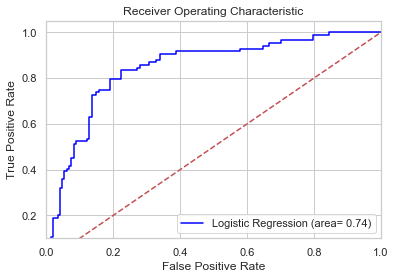

In [83]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(b_test, logreg.predict(A_test))
fpr, tpr, thresholds = roc_curve(b_test, logreg.predict_proba(A_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area= %0.2f)' % logit_roc_auc, color = 'blue')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.1, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()